In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../resources/processed/v4/train_20241104_filtering.csv')
df_candi1 = pd.read_csv('../resources/processed/for_merge/ver2.csv')
df_candi2 = pd.read_csv('../resources/processed/for_merge/ver2_twice.csv')

In [3]:
df

,index,ID,text,target,target_name,source,similarity
0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20060
1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.22637
2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.20635
3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18595
4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.21905
...,...,...,...,...,...,...,...
9588,11608,ynat-v1_train_02797,"텔레그램 등 암호화 메신저, 아시아서 2시간 다운...사용자 혼란",4,IT과학,noisy,0.21980
9589,11609,ynat-v1_train_02797,C 버전을 업데이트한 후 텔레그램과 같은 메신저가 2시간 동안 다운되었는데 원인은 ...,4,IT과학,noisy,0.22245
9590,11610,ynat-v1_train_02797,텔레그램 및 기타 암호화 메신저는 아시아에서 2시간 동안 다운되었습니다... 사용자 혼란,4,IT과학,noisy,0.21626
9591,11612,ynat-v1_train_02798,인터뷰 류현진 친구에게 안타 맞는 것 싫어해 승부는 냉정,1,스포츠,not_noisy,0.20228


In [4]:
df_candi = pd.concat([df_candi1, df_candi2])

In [5]:
df_candi = df_candi.drop_duplicates('text')

In [6]:
df_candi = df_candi.reset_index(drop=True)
df_candi = df_candi.reset_index()

In [7]:
df_candi

,index,ID,text,target
0,0,ynat-v1_train_00003,갤노트8 주말 27만대 개통...시장은 불법 단말기 보조금 얼룩,4
1,1,ynat-v1_train_00005,美성인 6명 중 1명꼴 배우자·연인 빚 모두 혼자 떠안은 적 있다,6
2,2,ynat-v1_train_00007,현대캐피탈 아가메즈 33득점 우리카드 KB손해보험 완파...3위 굳혀,1
3,3,ynat-v1_train_00008,어제 박근혜 전 대통령 얼마나 많이 놀라셨어요...경주 지진현장 방문 종합,2
4,4,ynat-v1_train_00009,듀얼심 아이폰 하반기 국내 출시설 솔솔...알뜰폰 기대감,4
...,...,...,...,...
2399,2399,ynat-v1_train_02794,"문재인 대통령, 김기식 전 금감원장 사표 즉각 수리키로(종합)",2
2400,2400,ynat-v1_train_02795,트럼프 폭스뉴스 앵커들 트윗 충성도 너무 후한 점수 매겨...10점 만점에 고작 12점도,6
2401,2401,ynat-v1_train_02796,오늘 오전 부터 삼성 갤럭시S9 국내 정식 출시 첫 주말 이통시장 잠잠,4
2402,2402,ynat-v1_train_02798,"인터뷰: 솔직히 난 류현진, 친구에게 연속 안타 맞는 다는 것 싫어해...승부는 냉정",1


In [8]:
label_encodeing_dic = {'생활문화': 0, '스포츠': 1, '정치': 2, '사회': 3, 'IT과학': 4, '경제': 5, '세계': 6}
label_decoding_dic = {v:k for k, v in label_encodeing_dic.items()}

In [9]:
df_candi['ID'] = [str(x) for x in df_candi['index']]
df_candi['index'] = [x for x in range(df['index'].max()+1, df['index'].max()+ len(df_candi)+1)]
df_candi['target_name'] = [label_decoding_dic[x] for x in df_candi['target']]
df_candi['source'] = 'not_noisy_ner'
df_candi['similarity'] = 0

In [10]:
df_candi

,index,ID,text,target,target_name,source,similarity
0,11614,0,갤노트8 주말 27만대 개통...시장은 불법 단말기 보조금 얼룩,4,IT과학,not_noisy_ner,0
1,11615,1,美성인 6명 중 1명꼴 배우자·연인 빚 모두 혼자 떠안은 적 있다,6,세계,not_noisy_ner,0
2,11616,2,현대캐피탈 아가메즈 33득점 우리카드 KB손해보험 완파...3위 굳혀,1,스포츠,not_noisy_ner,0
3,11617,3,어제 박근혜 전 대통령 얼마나 많이 놀라셨어요...경주 지진현장 방문 종합,2,정치,not_noisy_ner,0
4,11618,4,듀얼심 아이폰 하반기 국내 출시설 솔솔...알뜰폰 기대감,4,IT과학,not_noisy_ner,0
...,...,...,...,...,...,...,...
2399,14013,2399,"문재인 대통령, 김기식 전 금감원장 사표 즉각 수리키로(종합)",2,정치,not_noisy_ner,0
2400,14014,2400,트럼프 폭스뉴스 앵커들 트윗 충성도 너무 후한 점수 매겨...10점 만점에 고작 12점도,6,세계,not_noisy_ner,0
2401,14015,2401,오늘 오전 부터 삼성 갤럭시S9 국내 정식 출시 첫 주말 이통시장 잠잠,4,IT과학,not_noisy_ner,0
2402,14016,2402,"인터뷰: 솔직히 난 류현진, 친구에게 연속 안타 맞는 다는 것 싫어해...승부는 냉정",1,스포츠,not_noisy_ner,0


In [11]:
df_candi = df_candi.drop_duplicates('text')

In [12]:
df_f = pd.concat([df, df_candi])

In [13]:
df_f = df_f.reset_index(drop=True)

In [14]:
df_f

,index,ID,text,target,target_name,source,similarity
0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20060
1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.22637
2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.20635
3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18595
4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.21905
...,...,...,...,...,...,...,...
11992,14013,2399,"문재인 대통령, 김기식 전 금감원장 사표 즉각 수리키로(종합)",2,정치,not_noisy_ner,0.00000
11993,14014,2400,트럼프 폭스뉴스 앵커들 트윗 충성도 너무 후한 점수 매겨...10점 만점에 고작 12점도,6,세계,not_noisy_ner,0.00000
11994,14015,2401,오늘 오전 부터 삼성 갤럭시S9 국내 정식 출시 첫 주말 이통시장 잠잠,4,IT과학,not_noisy_ner,0.00000
11995,14016,2402,"인터뷰: 솔직히 난 류현진, 친구에게 연속 안타 맞는 다는 것 싫어해...승부는 냉정",1,스포츠,not_noisy_ner,0.00000


In [15]:
df_aug = pd.read_csv('../resources/processed/for_merge/updated_not_noisy_auged.csv', index_col=0)

In [16]:
df_aug = df_aug.reset_index()

In [17]:
df_aug = df_aug.reset_index()

In [18]:
df_aug

,index,ID,text,target
0,0,ynat-v1_train_00003,"갤노트 주말 판매, 불법 보조금 논란에 휩싸여",4
1,1,ynat-v1_train_00005,"미국 배우자, 명품 브랜드와 연인에 휘말린 빚 문제",6
2,2,ynat-v1_train_00007,"아가메즈 승리, 우리카드 손해보험 완파에 위기",1
3,3,ynat-v1_train_00008,"지진 피해 상황 확인, 朴 대통령 경주 현장 방문",2
4,4,ynat-v1_train_00009,"아이폰 듀얼심 출시, 하반기 알뜰폰 시장 뜨겁게",4
...,...,...,...,...
1208,1208,ynat-v1_train_02794,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2
1209,1209,ynat-v1_train_02795,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6
1210,1210,ynat-v1_train_02796,"갤럭시 출시, 삼성-이통시장에 파도",4
1211,1211,ynat-v1_train_02798,"류현진, 친구 인터뷰에 안타 만날 것 두려워",1


In [19]:
df_aug['ID'] = [str(x) for x in df_aug['index']]
df_aug['index'] = [x for x in range(df_f['index'].max()+1, df_f['index'].max()+ len(df_aug)+1)]
df_aug['target_name'] = [label_decoding_dic[x] for x in df_aug['target']]
df_aug['source'] = 'aug_update'
df_aug['similarity'] = 0

In [20]:
df_aug

,index,ID,text,target,target_name,source,similarity
0,14018,0,"갤노트 주말 판매, 불법 보조금 논란에 휩싸여",4,IT과학,aug_update,0
1,14019,1,"미국 배우자, 명품 브랜드와 연인에 휘말린 빚 문제",6,세계,aug_update,0
2,14020,2,"아가메즈 승리, 우리카드 손해보험 완파에 위기",1,스포츠,aug_update,0
3,14021,3,"지진 피해 상황 확인, 朴 대통령 경주 현장 방문",2,정치,aug_update,0
4,14022,4,"아이폰 듀얼심 출시, 하반기 알뜰폰 시장 뜨겁게",4,IT과학,aug_update,0
...,...,...,...,...,...,...,...
1208,15226,1208,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2,정치,aug_update,0
1209,15227,1209,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6,세계,aug_update,0
1210,15228,1210,"갤럭시 출시, 삼성-이통시장에 파도",4,IT과학,aug_update,0
1211,15229,1211,"류현진, 친구 인터뷰에 안타 만날 것 두려워",1,스포츠,aug_update,0


In [21]:
df_f = pd.concat([df_f, df_aug])

In [22]:
df_f = df_f.rename(columns={'index': 'before_index'})

In [23]:
df_f

,before_index,ID,text,target,target_name,source,similarity
0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20060
1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.22637
2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.20635
3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18595
4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.21905
...,...,...,...,...,...,...,...
1208,15226,1208,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2,정치,aug_update,0.00000
1209,15227,1209,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6,세계,aug_update,0.00000
1210,15228,1210,"갤럭시 출시, 삼성-이통시장에 파도",4,IT과학,aug_update,0.00000
1211,15229,1211,"류현진, 친구 인터뷰에 안타 만날 것 두려워",1,스포츠,aug_update,0.00000


In [24]:
df_f = df_f.reset_index(drop=True)
df_f = df_f.reset_index()

In [25]:
df_f

,index,before_index,ID,text,target,target_name,source,similarity
0,0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20060
1,1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.22637
2,2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.20635
3,3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18595
4,4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.21905
...,...,...,...,...,...,...,...,...
13205,13205,15226,1208,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2,정치,aug_update,0.00000
13206,13206,15227,1209,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6,세계,aug_update,0.00000
13207,13207,15228,1210,"갤럭시 출시, 삼성-이통시장에 파도",4,IT과학,aug_update,0.00000
13208,13208,15229,1211,"류현진, 친구 인터뷰에 안타 만날 것 두려워",1,스포츠,aug_update,0.00000


In [26]:
df_f['source'].value_counts()

source
noisy            8584
not_noisy_ner    2404
aug_update       1213
not_noisy        1009
Name: count, dtype: int64

### sentence 임베딩

In [27]:
from sentence_transformers import SentenceTransformer

# Download from the 🤗 Hub
model = SentenceTransformer("dragonkue/bge-m3-ko")

/data/ephemeral/home/ksh/level2-nlp-datacentric-nlp-08/.venv_sh/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [28]:
sentences = df_f['text'].tolist()

In [29]:
len(sentences)

13210

In [31]:
embeddings = model.encode(sentences)
print(embeddings.shape)

(13210, 1024)


In [32]:
np.save('embeddings_ner_aug.npy', embeddings)

### 임베딩 벡터 불러와서 similarity 계산

In [33]:
embeddings = np.load('embeddings_ner_aug.npy')

In [34]:
embeddings.shape

(13210, 1024)

In [35]:
df_noisy = df_f[df_f['source'] == 'noisy']

In [36]:
topic_similarity_dic = {}
for _, group in df_noisy.groupby('target'):
    target = group['target'].tolist()[0]
    idx = group.index.tolist()
    embeddings_idx = embeddings[idx]
    target_embedding = np.mean(embeddings_idx, axis=0)
    topic_similarity_dic[target] = target_embedding

In [37]:
sim_result = []
for _, group in df_f.groupby('target'):
    target = group['target'].tolist()[0]
    print(target)
    target_embedding = topic_similarity_dic[target]
    idx = group.index.tolist()
    embedding_lst = embeddings[idx]
    target_similarity = embedding_lst @ target_embedding.T
    print(len(target_similarity))
    print(target_similarity.max())
    print(target_similarity.min())
    for i, s in zip(idx, target_similarity):
        sim_result.append([i, round(float(s), 5)])
    print()
    

0
1882
0.2610103
0.13194358

1
1930
0.30554384
0.098614484

2
1990
0.3225543
0.16503665

3
1749
0.28097844
0.114240475

4
1872
0.35098082
0.13335747

5
1770
0.33385924
0.1277742

6
2017
0.28714702
0.14435872



In [38]:
df_sim = pd.DataFrame(sim_result, columns=['index', 'similarity'])

In [39]:
df_sim

,index,similarity
0,57,0.17602
1,58,0.21513
2,59,0.18998
3,60,0.18891
4,61,0.22758
...,...,...
13205,13194,0.19684
13206,13201,0.17313
13207,13203,0.17470
13208,13204,0.17959


In [40]:
df_f = df_f.drop('similarity', axis=1)

In [41]:
df_f

,index,before_index,ID,text,target,target_name,source
0,0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy
1,1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy
2,2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy
3,3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy
4,4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy
...,...,...,...,...,...,...,...
13205,13205,15226,1208,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2,정치,aug_update
13206,13206,15227,1209,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6,세계,aug_update
13207,13207,15228,1210,"갤럭시 출시, 삼성-이통시장에 파도",4,IT과학,aug_update
13208,13208,15229,1211,"류현진, 친구 인터뷰에 안타 만날 것 두려워",1,스포츠,aug_update


In [42]:
df_f = pd.merge(df_f, df_sim, how = 'left', on='index')

In [43]:
df_f

,index,before_index,ID,text,target,target_name,source,similarity
0,0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20434
1,1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.23111
2,2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.21015
3,3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18661
4,4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.22279
...,...,...,...,...,...,...,...,...
13205,13205,15226,1208,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2,정치,aug_update,0.26546
13206,13206,15227,1209,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6,세계,aug_update,0.18276
13207,13207,15228,1210,"갤럭시 출시, 삼성-이통시장에 파도",4,IT과학,aug_update,0.29401
13208,13208,15229,1211,"류현진, 친구 인터뷰에 안타 만날 것 두려워",1,스포츠,aug_update,0.19944


### 히스토그램 및 이상치 확인하여 제거

In [44]:
import matplotlib.pyplot as plt

def find_outliers(data, target_name=None):
    # 리스트를 NumPy 배열로 변환
    arr = np.array(data)
    
    # 사분위수 계산
    Q1 = np.percentile(arr, 25)
    Q3 = np.percentile(arr, 75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 상한과 하한 경계 계산
    # if target_name == '경제':
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    # else:
        # lower_bound = Q1 - 0.5 * IQR
        # upper_bound = Q3 + 1 * IQR
    
    
    # 이상치 찾기
    outliers = arr[(arr < lower_bound) | (arr > upper_bound)]
    
    return lower_bound, upper_bound, outliers

생활문화
0.16784749999999998 0.21801749999999998
130 ['애스턴마틴, 한국서 첫 4P 모델 500대 생산 돌입', '2023년 수능, 전국적으로 안정적인 진행... 학생들의 건강과 안전이 최우선입니다.', '년 전 일본 건너간 조선 첫 여성도공 백파선', 'SPT 기둥 사고, 안전 조치에 대한 시간당 임금', '산업현장 안전 문제와 재발 방지를 위한 대책에 대한 논의가 필요하다.', '서울 지하철 9호선 탈차사고로 4명이 다쳤다.', '정부, 무형문화유산 보호 위해 0비 구역 4.4km 확대 개발', '연천과 영해에서는 섭씨 9.1도까지 떨어지는 등 북쪽 지역의 추위를 조심하세요.', '연천, 영하 9.1도 기록...북부 지역 한파 경보 발령', '기소식 8부 장관 내무 6일 화재 대책 발표', '광공사 페루 여성 무장도 로 인해 지역 불안', '페루 여성 운동선수, 광공사 대회서 우승', '작년 우리나라 낙뢰 월에만 만번 벼락 맞을 확률은', '조시아가 쓴 독립선언서의 분배 섹션 편집.', '임동원, 김순권, 박예환 육군총장이 유엔 안전보장이사회에 선임된다.', '서울시립미술관서 추상화가 한묵 첫 유고전 개막', '내일날씨 새해 첫날 전국 가끔 구름 많음 아침 기온 영하 도', '경기 Xa권, Q존주 혁신적 발전 계획 8개 프로젝트 추진', 'Xa권, Q존주서 8개 B 활성화 프로젝트 발표', "윤석열 대통령, '이애미 사건'과 관련된 서울경매 경매 논란", '충북지역에서는 최고기온이 섭씨 17도로 밤에는 흐릿해진다.', '충북 날씨 예보, 낮 최고 17도...저녁부터 구름 증가 예상', 'KT급 대폭 상승해야 560% 증가', '더위 식히는 장맛비 남부 제주도 밤에 대부분 그쳐', '천은사는 행정 개편의 일환으로 축량령을 폐지한다.', '경북 개 시 군 호우특보 해제 대부분 비 그쳐', 'LH, 광주전남본부 보유 토지 대규모 매각 시작', "명령왕비의 '주치의 증언'이 출판된 직후 매진되었다.", '미생, 일본 기업 주최 

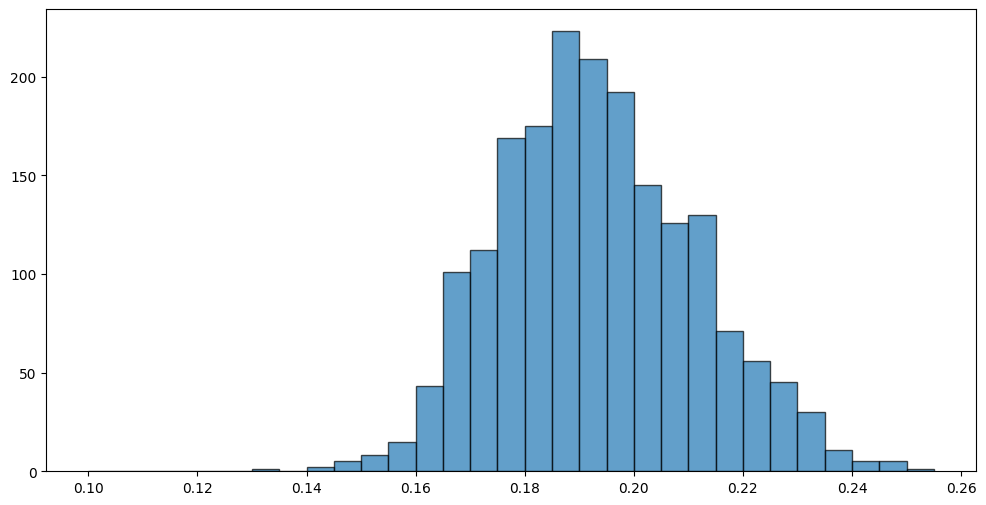

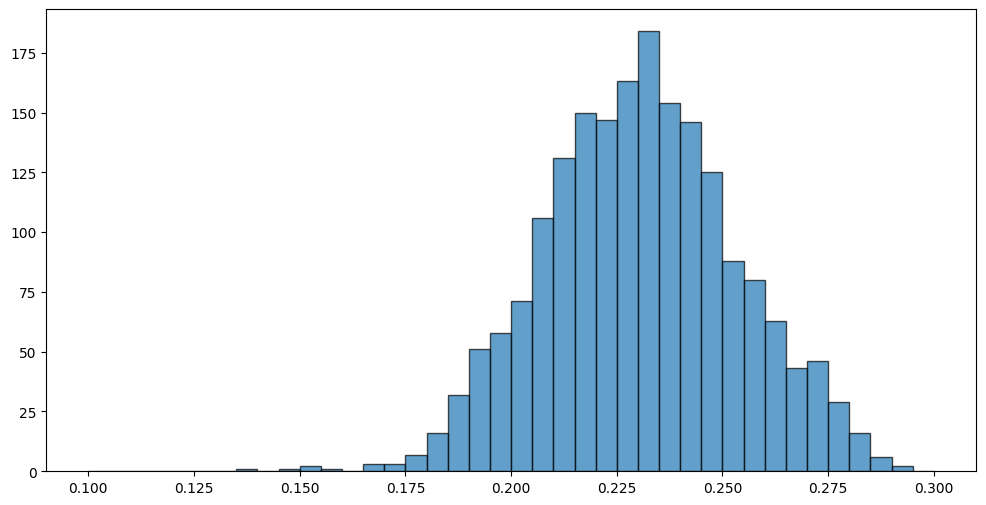

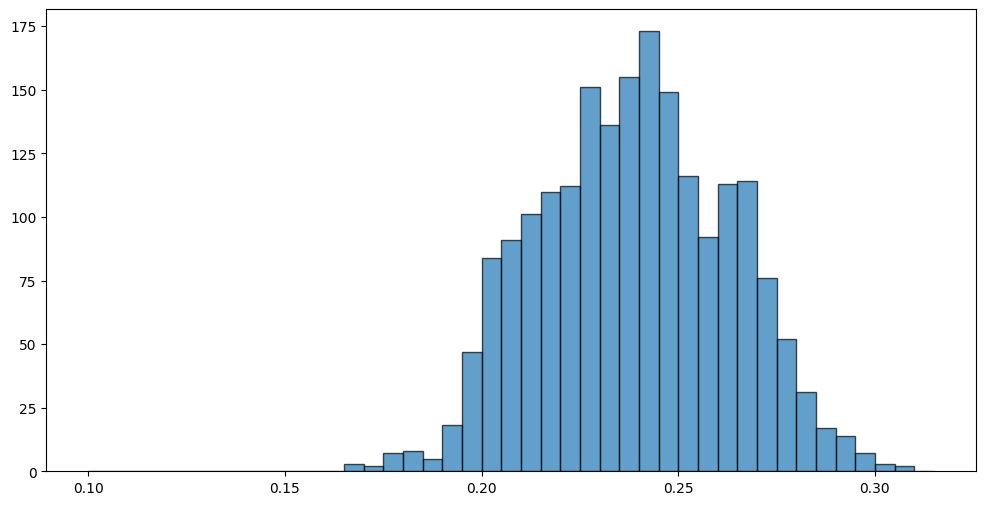

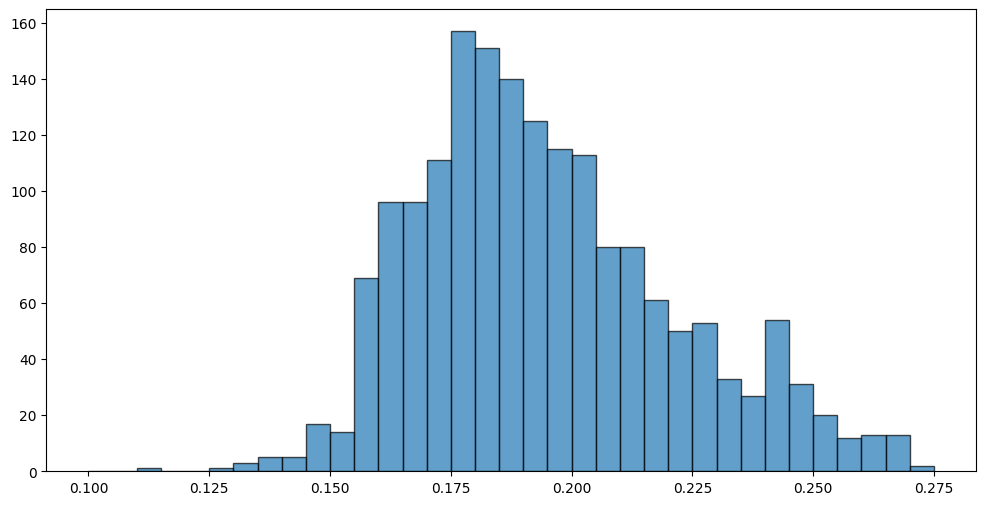

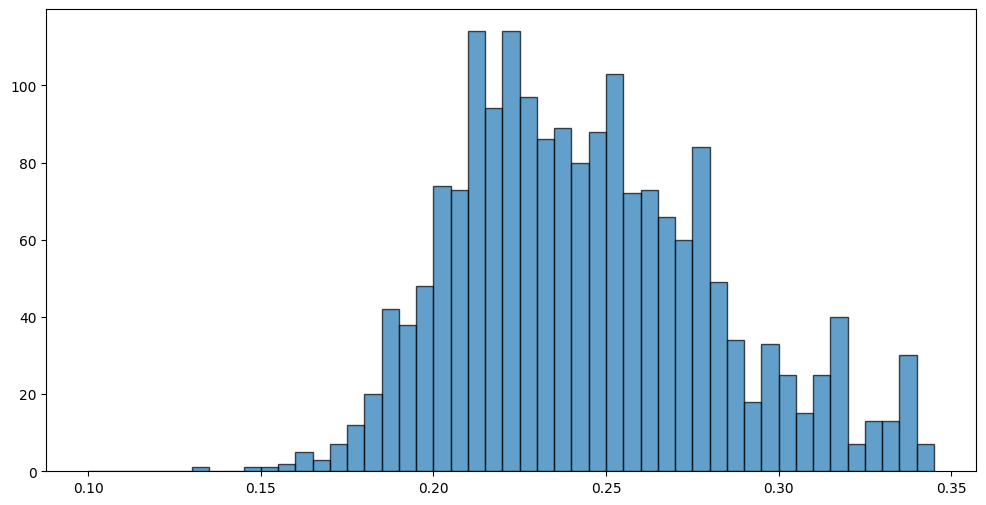

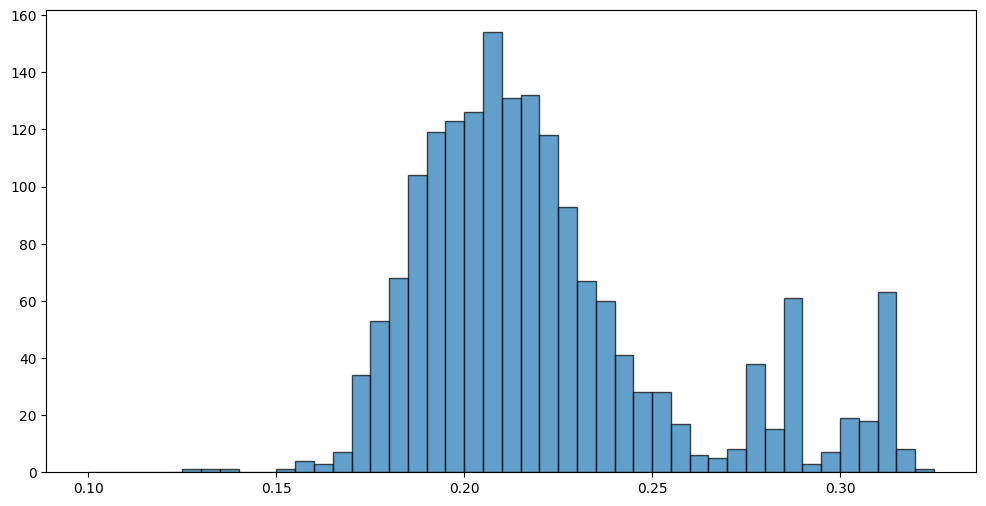

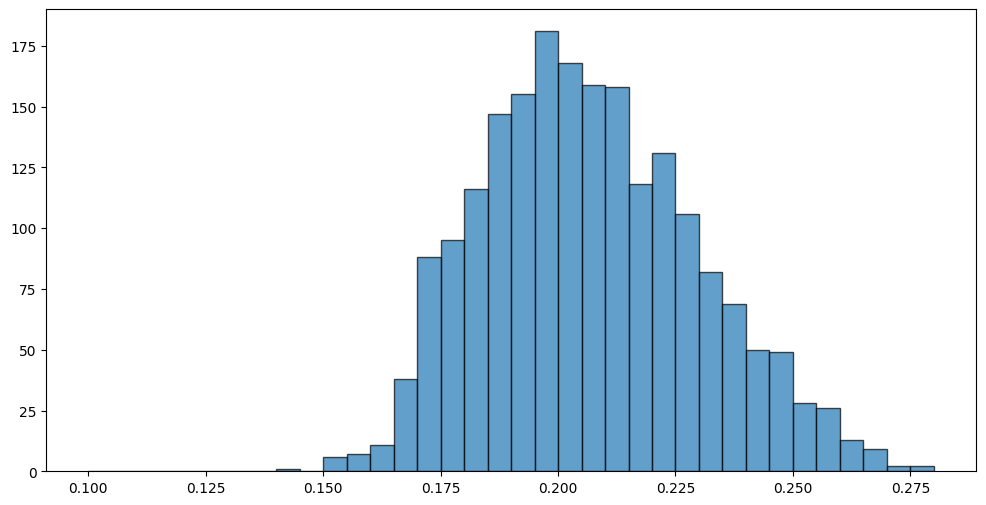

In [45]:
remove_idx = []
for _, group in df_f.groupby('target'):
    target_name = group['target_name'].tolist()[0]
    print(target_name)
    sim_lst = group['similarity'].tolist()
    lower_bound, upper_bound, outliers = find_outliers(sim_lst, target_name)
    print(lower_bound, upper_bound)
    lower_text_lst = group[group['similarity'] <= lower_bound]['text'].tolist()
    lower_idx_lst = group[group['similarity'] <= lower_bound].index.tolist()
    remove_idx.extend(lower_idx_lst)
    print(len(lower_text_lst), lower_text_lst)
    upper_text_lst = group[group['similarity'] >= upper_bound]['text'].tolist()
    upper_idx_lst = group[group['similarity'] >= upper_bound].index.tolist()
    upper_idx_lst_remove = np.random.choice(group.index, size=max(int(len(upper_idx_lst) * 0.95), 1) , replace=False)
    remove_idx.extend(upper_idx_lst_remove)
    print(len(upper_text_lst), upper_text_lst)
    bins = np.arange(0.10, max(sim_lst), 0.005)
    plt.figure(figsize=(12, 6))
    plt.hist(sim_lst, bins=bins[:-1], edgecolor='black', alpha=0.7)
    print()
    

In [46]:
len(remove_idx)

2174

In [47]:
df_f

,index,before_index,ID,text,target,target_name,source,similarity
0,0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20434
1,1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.23111
2,2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.21015
3,3,3,ynat-v1_train_00000,정 파 미사 KT 이용기간 단 분종 보,4,IT과학,noisy,0.18661
4,4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.22279
...,...,...,...,...,...,...,...,...
13205,13205,15226,1208,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2,정치,aug_update,0.26546
13206,13206,15227,1209,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6,세계,aug_update,0.18276
13207,13207,15228,1210,"갤럭시 출시, 삼성-이통시장에 파도",4,IT과학,aug_update,0.29401
13208,13208,15229,1211,"류현진, 친구 인터뷰에 안타 만날 것 두려워",1,스포츠,aug_update,0.19944


In [48]:
df_f2 = df_f[~df_f['index'].isin(remove_idx)]

In [49]:
df_f2 = df_f2.drop('index', axis=1)

In [50]:
df_f['source'].value_counts()

source
noisy            8584
not_noisy_ner    2404
aug_update       1213
not_noisy        1009
Name: count, dtype: int64

In [51]:
df_f2['source'].value_counts()

source
noisy            7455
not_noisy_ner    1900
aug_update        920
not_noisy         844
Name: count, dtype: int64

In [52]:
df_f2.to_csv('../resources/processed/v4/train_20241104_filtering_mask_aug.csv', encoding='utf-8-sig', index=0)

In [53]:
df_f2

,before_index,ID,text,target,target_name,source,similarity
0,0,ynat-v1_train_00000,"정부, '주파수 미사용' KT에 이용기간 2년 단축 처분(종합2보)",4,IT과학,noisy,0.20434
1,1,ynat-v1_train_00000,"정부, KT 주파수 미사용에 강력한 제재 조치",4,IT과학,noisy,0.23111
2,2,ynat-v1_train_00000,"KT, 주파수 미사용으로 이용기간 2년 단축 처분",4,IT과학,noisy,0.21015
4,4,ynat-v1_train_00000,"KT, 주파수 미사용으로 인한 사용 기간의 2년 단축.",4,IT과학,noisy,0.22279
7,9,ynat-v1_train_00001,찰 국 로 한 회장 송,3,사회,noisy,0.18111
...,...,...,...,...,...,...,...
13204,15225,1207,"경찰, 월초 유커와 일본 관광객 대상 바가지 요금 집중 단속",6,세계,aug_update,0.17959
13205,15226,1208,"김기식 금감원장 사표, 문 대통령 수리키로 종합",2,정치,aug_update,0.26546
13206,15227,1209,"트럼프, 폭스뉴스 앵커들의 충성도 평가",6,세계,aug_update,0.18276
13207,15228,1210,"갤럭시 출시, 삼성-이통시장에 파도",4,IT과학,aug_update,0.29401
